In [1]:
import matplotlib.pyplot as plt
import torch
import os
from pathlib import Path
os.chdir("..")  # Change root dir to project folder
os.getcwd()

'/home/bbd0953/diffusion/src'

In [9]:
(True and 2) or 3

2

In [2]:
# Lofar data variance
from utils.data_utils import LofarSubset
data = LofarSubset()

Loading images...


100%|███████████████████████████████████| 84404/84404 [00:17<00:00, 4861.05it/s]

Data set initialized.


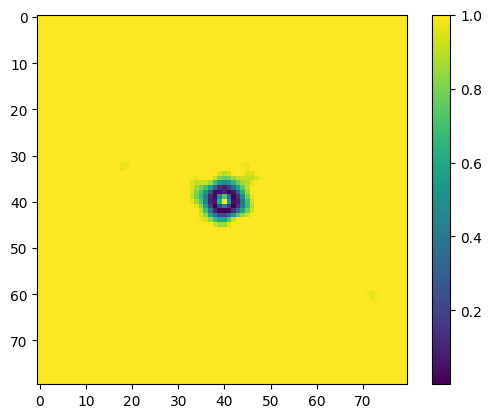

In [23]:
import matplotlib.pyplot as plt

img = data[0][0]
plt.colorbar(plt.imshow(img**2))

In [25]:
torch.sum(img**2).item()

6346.34326171875

In [30]:
# Variance for all images in data set
from torch.utils.data import DataLoader
from tqdm import tqdm
from utils.device_utils import distribute_model

dl = DataLoader(data, batch_size=50, shuffle=False)
var = 0

LINE_UP = '\033[1A'
LINE_CLEAR = '\x1b[2K'
print(var)

for i, img in enumerate(data):
    var = (var * i + torch.sum(img[0]**2) / 6400) / (i+1)
    if (i+1) % 100 == 0:
        print(LINE_UP, end=LINE_CLEAR)
        print(f"{var.item()} - {i+1}/{len(data)}")

0
0.9756069183349609 - 100/84404
0.9736884236335754 - 200/84404
0.9749495387077332 - 300/84404
0.975203275680542 - 400/84404
0.9760056734085083 - 500/84404
0.9763950705528259 - 600/84404
0.9767154455184937 - 700/84404
0.9768875241279602 - 800/84404
0.9772967100143433 - 900/84404
0.9772658348083496 - 1000/84404
0.9775098562240601 - 1100/84404
0.9772654175758362 - 1200/84404
0.977238118648529 - 1300/84404
0.977125346660614 - 1400/84404
0.9770267009735107 - 1500/84404
0.9770396947860718 - 1600/84404
0.9770533442497253 - 1700/84404
0.9770443439483643 - 1800/84404
0.9768658876419067 - 1900/84404
0.9768049120903015 - 2000/84404
0.9769275188446045 - 2100/84404
0.9767582416534424 - 2200/84404
0.9767502546310425 - 2300/84404
0.9767966866493225 - 2400/84404
0.9767429828643799 - 2500/84404
0.9766793847084045 - 2600/84404
0.9765794277191162 - 2700/84404
0.9765276312828064 - 2800/84404
0.9765408039093018 - 2900/84404
0.9764722585678101 - 3000/84404
0.9764575362205505 - 3100/84404


KeyboardInterrupt: 

In [3]:
gpu_stats = subprocess.check_output(
        ["nvidia-smi", "--format=csv", "--query-gpu=memory.used,memory.free"]
    )
gpu_df = pd.read_csv(StringIO(gpu_stats.decode()),
                        names=['memory.used', 'memory.free'],
                        skiprows=1)
# print('GPU usage:\n{}'.format(gpu_df))
gpu_df['memory.free'] = gpu_df['memory.free'].map(
    lambda x: x.rstrip(' [MiB]')
)
gpu_df.sort_values(by='memory.free', inplace=True, ascending=False)

In [6]:
torch.load('/home/bbd0953/diffusion/results/'\
        'InitModel_EDM_SnapshotRun/snapshots/ema_iter_20000.pt',
        map_location='cpu')

OrderedDict([('model.time_emb.1.weight',
              tensor([[-0.0636,  0.0505,  0.0829,  ..., -0.0112,  0.0133, -0.0454],
                      [-0.0090, -0.0736,  0.0434,  ...,  0.0272, -0.0401, -0.0260],
                      [-0.0120,  0.0600,  0.0231,  ..., -0.0178, -0.0039,  0.0393],
                      ...,
                      [-0.0596, -0.0578, -0.0202,  ..., -0.0445,  0.0101, -0.0670],
                      [ 0.0811,  0.0346, -0.0198,  ...,  0.0021, -0.0553,  0.0723],
                      [ 0.0324, -0.0618,  0.0693,  ...,  0.0322, -0.0333,  0.0261]])),
             ('model.time_emb.1.bias',
              tensor([-6.6220e-02, -4.7661e-02, -6.4055e-02, -2.4583e-02,  6.3526e-02,
                       3.3513e-02, -6.8849e-02,  8.0342e-02, -4.0983e-03, -2.8501e-02,
                      -3.6242e-03, -7.3157e-02, -6.6464e-02,  1.7701e-02, -4.4331e-02,
                      -4.5970e-02,  1.4891e-02,  2.0093e-02,  5.6989e-03, -4.0299e-02,
                       6.4046e-02, -9.

In [18]:
# Select rows of which index is contained in available
gpu_df.loc[available]

,memory.used,memory.free
2,125 MiB,80926
3,133 MiB,80918


In [4]:
import os

from ray import tune
from pathlib import Path
from model.tune import *

dirs = [
    "/home/bbd0953/diffusion/results/tune/lr_bsize_BOHB_00",
    "/home/bbd0953/diffusion/results/tune/lr_bsize_BOHB_pretrained-6kIter_00",
]

best = []
for dir in dirs:
    tuner = tune.Tuner.restore(dir, trainable=train_wrapper)
    bohb_results = tuner.get_results()
    best.append(bohb_results.get_best_result())

In [12]:
path = Path("/home/bbd0953/diffusion/results/Diffusion v1/DDPM_23-09-01_08:03:11_EMA.pt")

state_dict = torch.load(path, map_location='cpu')
# Print number of parameters
print(f"Number of parameters: {sum(p.numel() for p in state_dict.values()):_}")

Number of parameters: 88_889_921


In [6]:
file.with_suffix(".json")

PosixPath('/home/bbd0953/diffusion/results/OptiModel_Initial/hyperparameters_OptiModel_Initial.json')

In [7]:
from pathlib import Path
import humanize

parent = Path("data/generated/diffusion_v1.0/")
    
print(len(sorted(parent.glob('**/*'))), "files.")
    
size = sum(f.stat().st_size for f in parent.glob('**/*') if f.is_file())
size += parent.stat().st_size if parent.is_file() else 0
print(f"Size: {humanize.naturalsize(size)}")

13500 files.
Size: 11.7 MB


In [3]:
import datetime
datetime.datetime.now().strftime("%H:%M:%S")

'14:00:41'

In [9]:
from torch.utils.data import DataLoader
from tqdm import tqdm


def test_dl(dl):
    for _ in tqdm(range(10)):
        next(iter(dl))

for n in range(4):
    dl = DataLoader(dataset, batch_size=128, num_workers=n, drop_last=True)
    print(f"\n{n}")
    %timeit test_dl(dl)


0


100%|██████████| 10/10 [00:47<00:00,  4.70s/it]


46.5 s ± 1.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

1


100%|██████████| 10/10 [00:03<00:00,  2.67it/s]


3.75 s ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

2


100%|██████████| 10/10 [00:04<00:00,  2.05it/s]


4.85 s ± 24.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

3


100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

6.16 s ± 47.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
from model.unet import Unet
import inspect

inspect.signature(Unet.__init__).parameters.keys()

odict_keys(['self', 'init_channels', 'out_channels', 'channel_mults', 'input_channels', 'self_condition', 'resnet_norm_groups'])

DDIM loop step:   0%|          | 0/100 [00:00<?, ?it/s]

(<Figure size 1200x1200 with 36 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]],
       dtype=object))

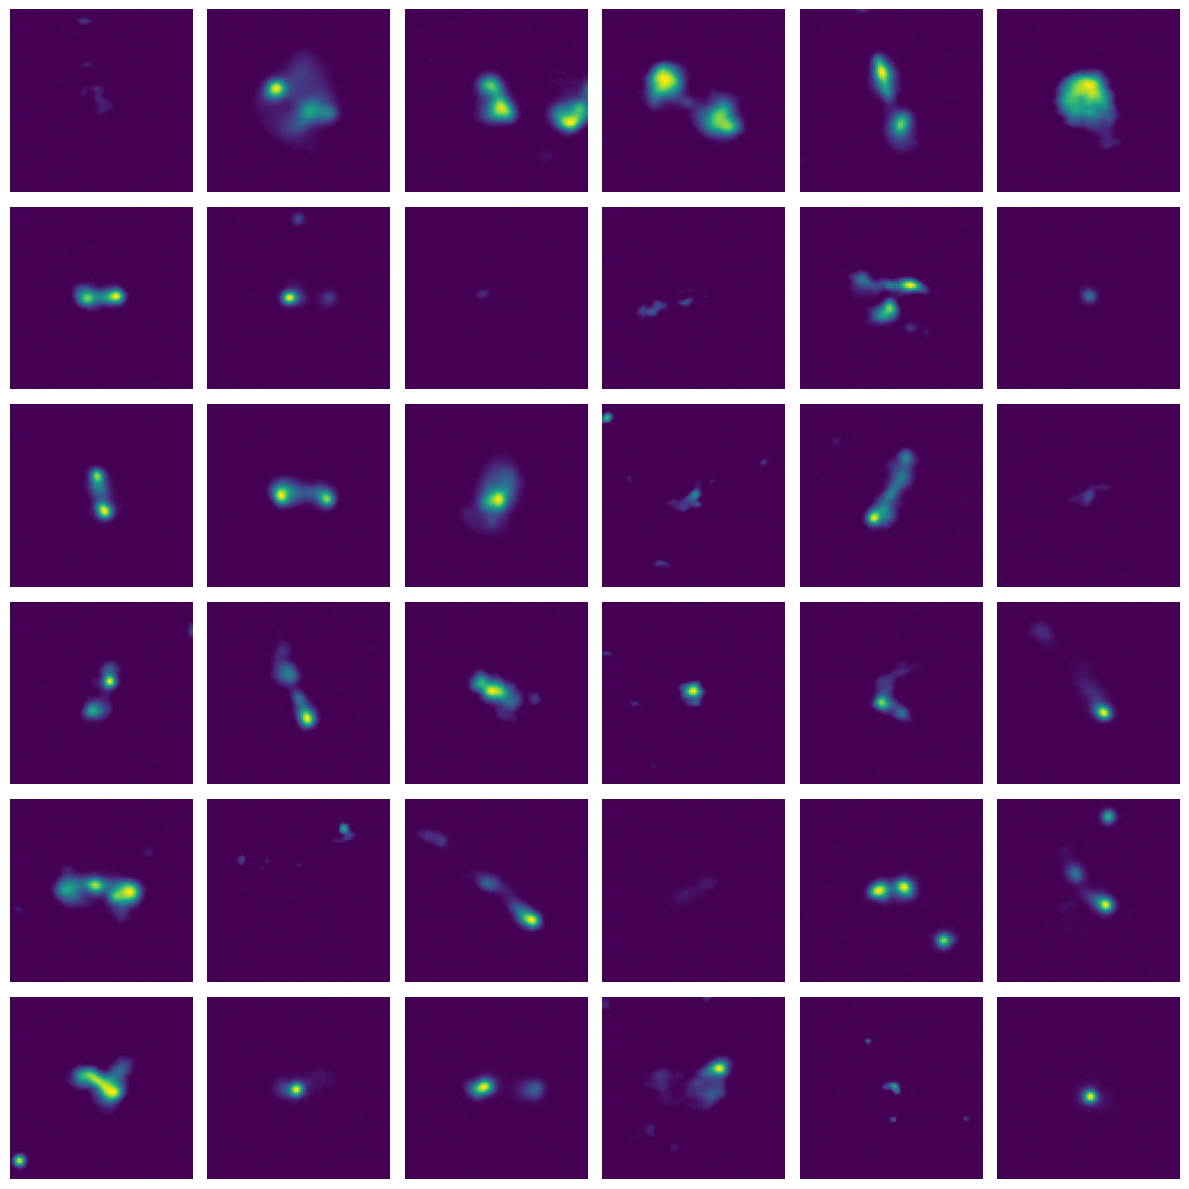

In [2]:
from torchvision.transforms import ToTensor, Compose, CenterCrop
from torch.utils.data import DataLoader

from firstgalaxydata import FIRSTGalaxyData as FGD
from unet import Unet

from diffusion import Diffusion
from utils import plot_samples

model_file = "/home/bbd0953/diffusion/results/DDPM_23-09-01_08:03:11_EMA.pt"

bsize = 36  # Should have integer square root

model = Unet(dim=160, channels=1, dim_mults=(1, 2, 3, 4)).to('cuda:1')
model.load_state_dict(torch.load(model_file))

diffusion = Diffusion(timesteps=1000)

imgs = diffusion.ddim_sample(model, 80, batch_size=bsize,)[-1]  # Only last time step
model = model.to('cpu');

plot_samples(imgs)

In [118]:
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
class ImagePathDataset(torch.utils.data.Dataset):
    # From:
    #  https://github.com/mseitzer/pytorch-fid/blob/master/src/pytorch_fid/fid_score.py
    def __init__(self, path, transforms=None):
        self.path = path
        self.files = sorted(self.path.iterdir())
        self.transforms = transforms

        print("Loading images...")
        load = lambda f: Image.open(f)
        self.data = list(map(load, tqdm(self.files)))

        print("Data set initialized.")

    def __len__(self):
        return len(self.files)

    def __getitem__(self, i):
        img = self.data[i]
        if self.transforms is not None:
            img = self.transforms(img)
        return img


def load_data(
    *, data_dir, batch_size, deterministic=False
):
    dataset = ImagePathDataset(data_dir, transforms=ToTensor())
    if deterministic:
        loader = DataLoader(
            dataset, batch_size=batch_size, shuffle=False, num_workers=1, drop_last=True
        )
    else:
        loader = DataLoader(
            dataset, batch_size=batch_size, shuffle=True, num_workers=1, drop_last=True
        )
    print("Mark 1")
    yield from loader
    print("Loop done.")

In [78]:
import shutil

dummy = Path("./data/dummy")
src = Path("./data/lofar_rand10k_0/")

i = 0
for f in src.iterdir():
    shutil.copy(f, dummy.joinpath(f.name))
    i += 1
    if i >= 3:
        break

In [119]:
from pathlib import Path

img_folder = Path("./data/dummy/")

data = load_data(data_dir=img_folder, batch_size=1)

Loading images...


  0%|                                                 | 0/13824 [00:00<?, ?it/s]

100%|███████████████████████████████████| 13824/13824 [00:02<00:00, 5929.95it/s]


Data set initialized.


Calculating distributions...: 100%|██████████| 28/28 [00:03<00:00,  9.31it/s]


Loading images...


100%|███████████████████████████████████| 84404/84404 [00:16<00:00, 5162.65it/s]


Data set initialized.


Calculating distributions...: 100%|██████████| 169/169 [00:16<00:00, 10.05it/s]


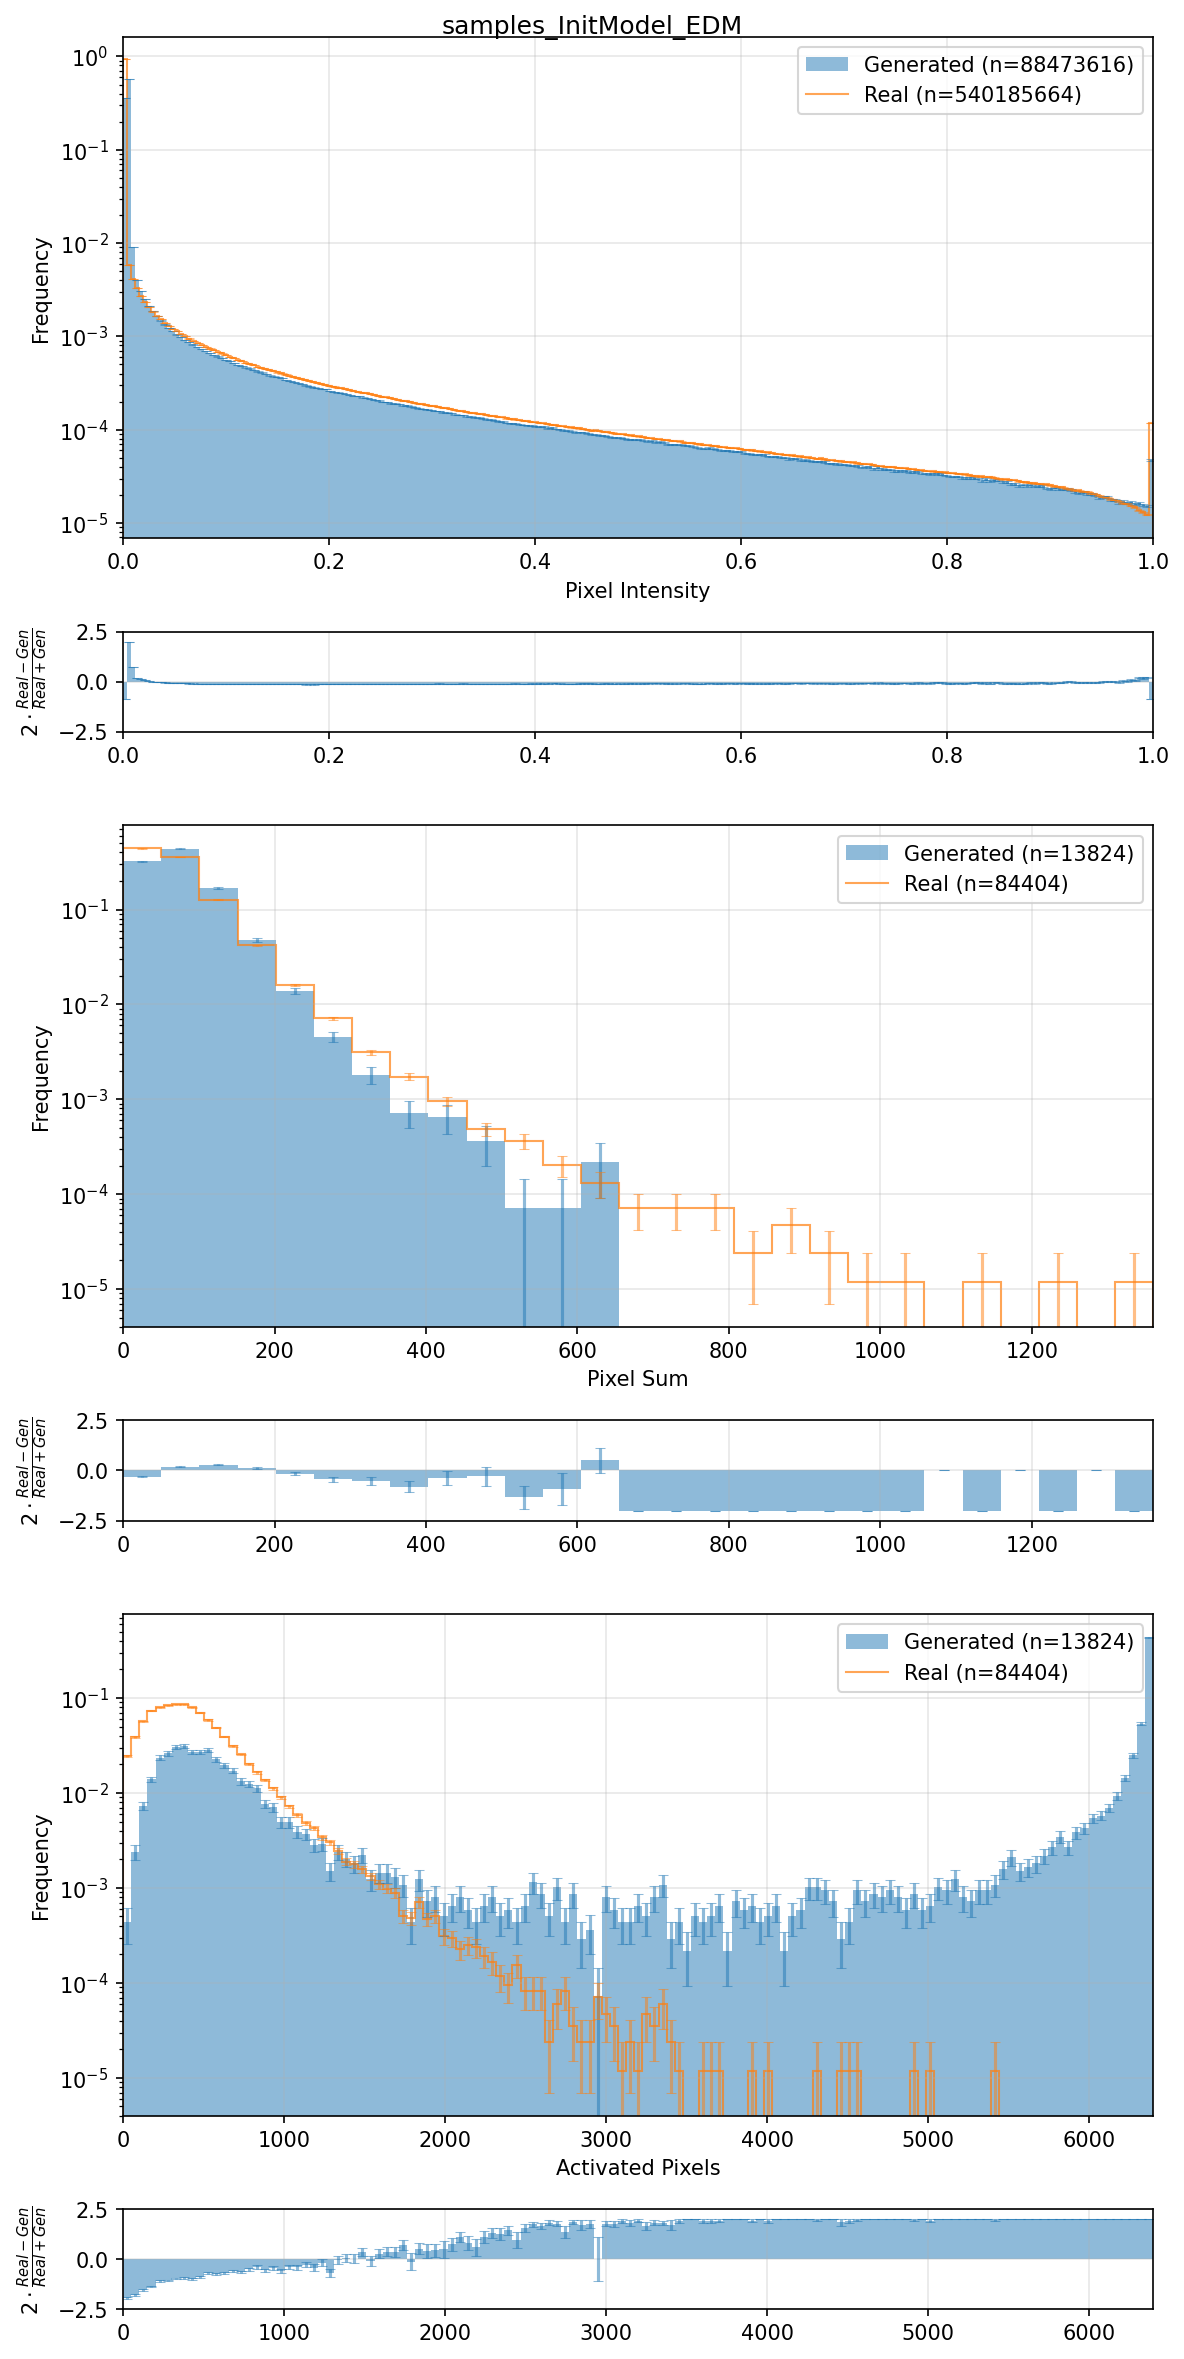

In [3]:
from analysis.model_evaluations import get_distributions, image_data_evaluation, get_distribution_plot_with_lofar

img_folder = Path("/home/bbd0953/diffusion/image_data/generated/samples_InitModel_EDM")

fig = get_distribution_plot_with_lofar(img_folder, save=False, act_threshold=0/256)

fig.show()



In [9]:
LOFAR_PATH = Path("/storage/tmartinez/image_data/lofar_subset")

from utils.data_utils import ImagePathDataset, GeneratedDataset, LofarSubset

dataset = ImagePathDataset(img_folder)

Loading images...


100%|███████████████████████████████████| 13824/13824 [00:02<00:00, 5882.00it/s]

Data set initialized.


In [10]:
img = dataset[0]
img.shape

torch.Size([3, 80, 80])